## Ensayos usando la libreria libEMG

En teoria la libreria se logro instalar con exito.

In [1]:
try:
    import libemg
    print("La librería 'libEMG' está instalada y se ha importado correctamente.")
except ImportError:
    print("La librería 'libEMG' no está instalada.")

La librería 'libEMG' está instalada y se ha importado correctamente.


Se importa el dataset a analizar mediante el OfflineDataHandler.

In [2]:
import os
import requests
from tqdm import tqdm
import os
import zipfile
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from libemg.datasets import *

## Funciones para descarga de bases de datos de Ninapro

Estas fueron hechas por Skynet.

### Acceso a los datos crudos

La ruta de los datos crudos es: `./tests/ninapro_DB1_raw_csv/Sx_Ay_[sensado].cvs`

In [5]:
from libemg.data_handler import OfflineDataHandler, RegexFilter

Definición del las variables del patron de la expresión regular

In [8]:
END_SUBJECT = 2

dataset_folder = 'ninapro_DB1_raw_csv'  # Carpeta donde están los archivos extraídos
subjects_values = [str(i) for i in range(1, END_SUBJECT + 1)] # Lista de sujetos a filtrar (s1 a s26)
actions_values = ['1']   # Por ahora solo con la primera adquisición
exercises_values = ['3'] # Ejercicio tipo 3 (agarres)

#### Datos EMG

`./tests/ninapro_DB1_raw_csv/S{x}_A{y}_E{z}_emg.cvs`

In [11]:
# Definir los filtros RegEx para extraer metadatos del nombre de archivo
emg_filters_emg = [
    RegexFilter(left_bound = "/S", right_bound="_", values = subjects_values, description='subject'),
    RegexFilter(left_bound = "A", right_bound="_", values = actions_values, description='action'),
    RegexFilter(left_bound = "E", right_bound="_emg.csv", values = exercises_values, description='exercise')
]

emg_odh = OfflineDataHandler()
emg_odh.get_data(folder_location = dataset_folder, regex_filters = emg_filters_emg, delimiter=",")

2 data files fetched out of 648 files.


#### Datos restimulus

`./tests/ninapro_DB1_raw_csv/S{x}_A{y}_E{z}_restimulus.cvs`

In [12]:
regex_filters_restimulus = [
    RegexFilter(left_bound = "/S", right_bound="_", values = subjects_values, description='subject'),
    RegexFilter(left_bound = "A", right_bound="_", values = actions_values, description='action'),
    RegexFilter(left_bound = "E", right_bound="_restimulus.csv", values = exercises_values, description='exercise')  
]

restimulus_odh = OfflineDataHandler()
restimulus_odh.get_data(folder_location = dataset_folder, regex_filters = regex_filters_restimulus, delimiter=",")

2 data files fetched out of 648 files.


#### Datos rerepetition

`./tests/ninapro_DB1_raw_csv/S{x}_A{y}_E{z}_rerepetition.cvs`

In [13]:
rerepetition_regex_filters = [
    RegexFilter(left_bound = "/S", right_bound="_", values = subjects_values, description='subject'),
    RegexFilter(left_bound = "A", right_bound="_", values = actions_values, description='action'),
    RegexFilter(left_bound = "E", right_bound="_rerepetition.csv", values = exercises_values, description='exercise')   
]

rerepetition_odh = OfflineDataHandler()
rerepetition_odh.get_data(folder_location = dataset_folder, regex_filters = rerepetition_regex_filters, delimiter=",")

2 data files fetched out of 648 files.


### Sujeto 1

In [17]:
index_s1 = 0

#### Obtencion de los datos

In [24]:
# Por ejemplo, obtener solo los datos del sujeto 1
emg_s1_e3 = emg_odh.isolate_data(key="subject", values=[index_s1]).data[0]
print(emg_s1_e3.shape)
rerepetition_s1_e3 = rerepetition_odh.isolate_data(key="subject", values=[index_s1]).data[0]
print(rerepetition_s1_e3.shape)
restimulus_s1_e3 = restimulus_odh.isolate_data(key="subject", values=[index_s1]).data[0]
print(restimulus_s1_e3.shape)


(227494, 10)
(227494, 1)
(227494, 1)


Se elimina la fila de los labels. Como primer ensayo se hace para la señal emg solamente.

In [25]:
emg_s1_e3 = emg_s1_e3[1:]
emg_s1_e3

array([[0.0024, 0.0024, 0.0024, ..., 0.0732, 0.0024, 0.0903],
       [0.0024, 0.0024, 0.0024, ..., 0.0757, 0.0024, 0.0928],
       [0.0024, 0.0024, 0.0024, ..., 0.0879, 0.0024, 0.0903],
       ...,
       [0.0024, 0.0024, 0.0024, ..., 0.0513, 0.127 , 0.0024],
       [0.0024, 0.0024, 0.0024, ..., 0.0488, 0.1294, 0.0024],
       [0.0024, 0.0024, 0.0024, ..., 0.0439, 0.1294, 0.0024]])

In [26]:
emg_s1_e3.shape

(227493, 10)

Se repite el procedimiento para las demas señales.

In [27]:
# Se elimina la primera fila, que contiene los nombres de las columnas de restimulus
restimulus_s1_e3 = restimulus_s1_e3[1:]
print(restimulus_s1_e3.shape)
# Se elimina la primera fila, que contiene los nombres de las columnas de rerepetition
rerepetition_s1_e3 = rerepetition_s1_e3[1:]
print(rerepetition_s1_e3.shape)

(227493, 1)
(227493, 1)


Se grafican las señales asociadas al sujeto 1

In [40]:
# 30000 # 227493 # 1000
END_POINT = 30000

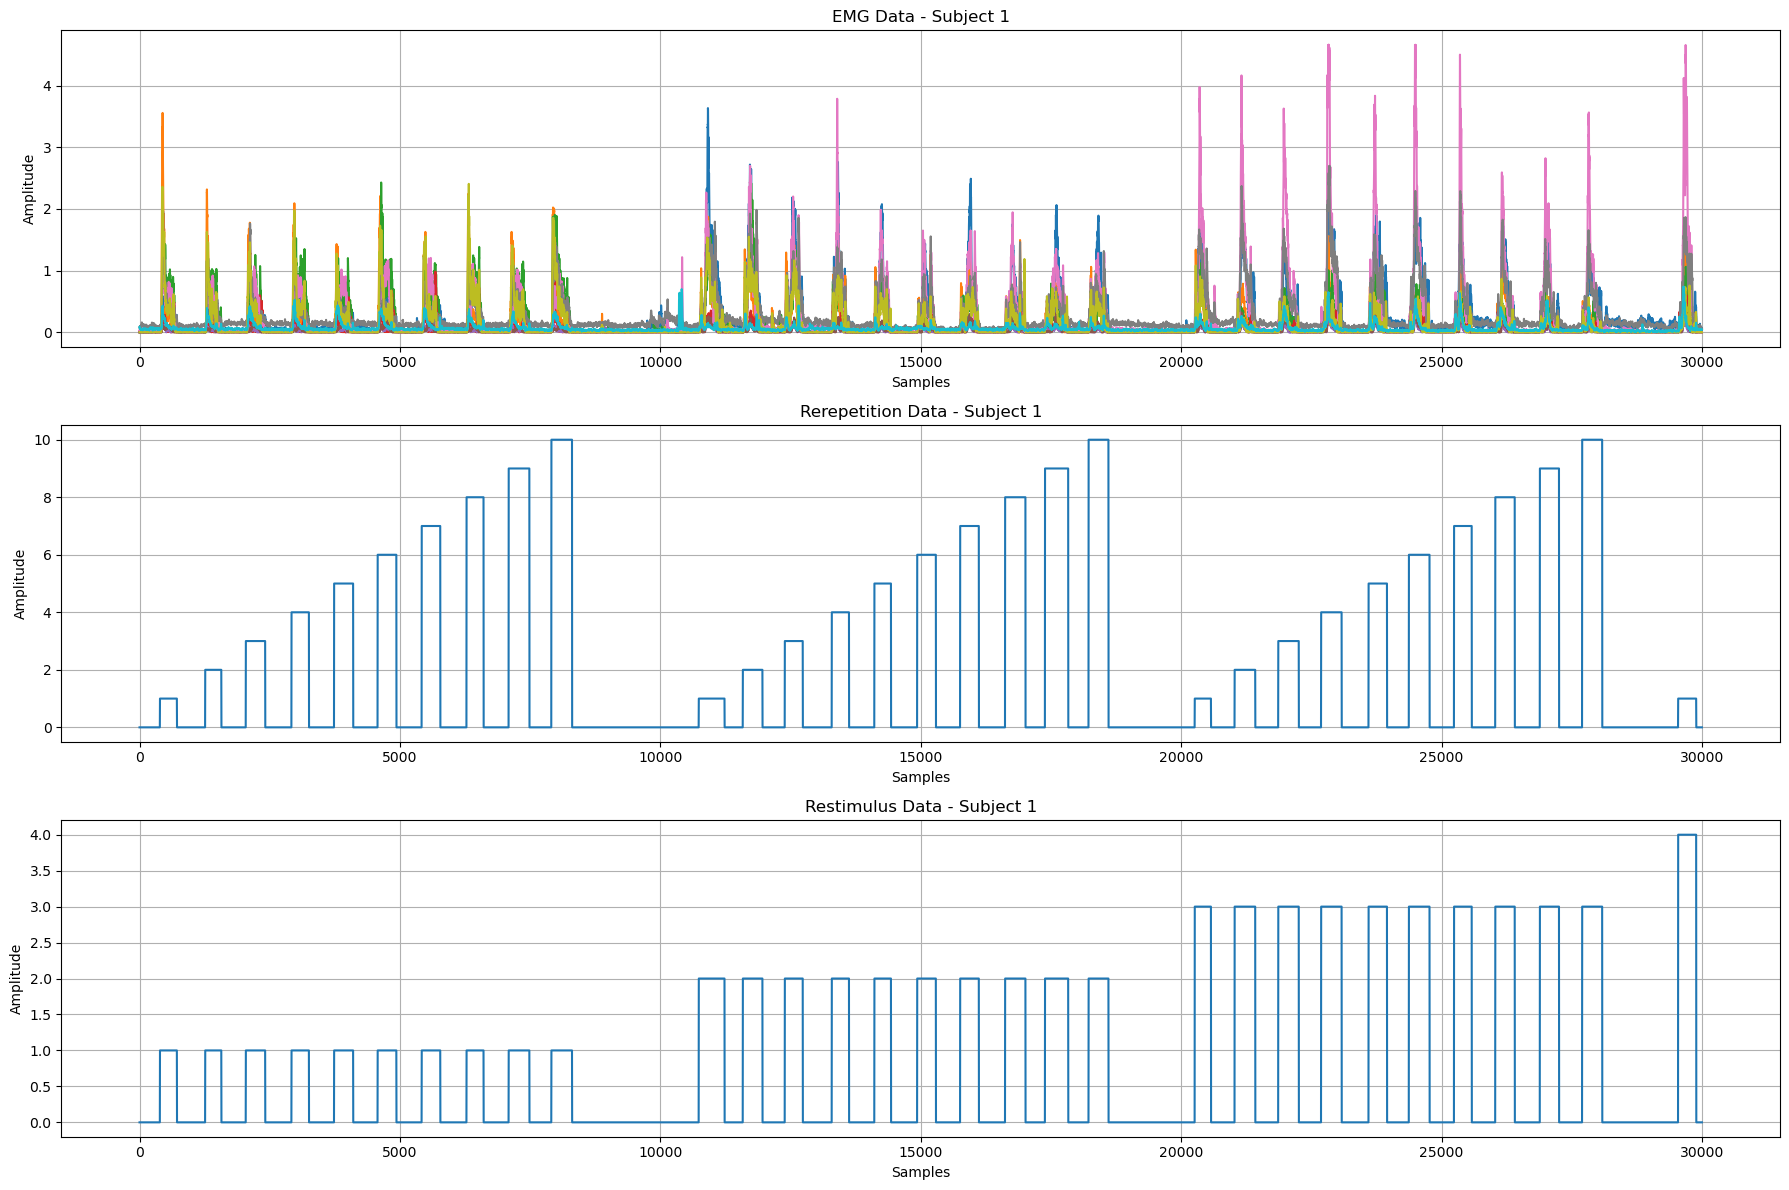

In [41]:
plt.figure(figsize=(18, 12))

# Primer subplot para emg_s1
plt.subplot(3, 1, 1)
plt.plot(emg_s1_e3[:END_POINT])  # Muestra los primeros 10,000 puntos
plt.title("EMG Data - Subject 1")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid(True)

# Segundo subplot para rerepetition_s1
plt.subplot(3, 1, 2)
plt.plot(rerepetition_s1_e3[:END_POINT])  # Muestra los primeros 10,000 puntos
plt.title("Rerepetition Data - Subject 1")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid(True)

# Tercer subplot para restimulus_s1
plt.subplot(3, 1, 3)
plt.plot(restimulus_s1_e3[:END_POINT])  # Muestra los primeros 10,000 puntos
plt.title("Restimulus Data - Subject 1")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Filtrado

In [46]:
# create a filter for low frequency motion artefacts
lowpass_filter_100Hz = { "name": "lowpass", "cutoff": 1, "order": 2}

In [44]:
# instantiate the filter object with the sampling frequency
f_sampling = 100
fi = libemg.filtering.Filter(f_sampling)
fi.install_filters(filter_dictionary = lowpass_filter_100Hz)

In [47]:
fi.sampling_frequency

100

In [48]:
emg_s1_e3_filter = fi.filter(emg_s1_e3)

In [ ]:
print(emg_s1_e3_filter.shape)

(227493, 10)


In [50]:
emg_s1_e3_filter

array([[0.00297809, 0.00240812, 0.00241752, ..., 0.07038426, 0.00241003,
        0.08909152],
       [0.00323179, 0.002409  , 0.00242017, ..., 0.07157543, 0.00241101,
        0.08740814],
       [0.0034872 , 0.00240993, 0.00242284, ..., 0.07277952, 0.00241203,
        0.08572366],
       ...,
       [0.00466762, 0.00239794, 0.00252283, ..., 0.04605528, 0.12248969,
        0.00246013],
       [0.00462831, 0.00239795, 0.00252202, ..., 0.04603566, 0.12249403,
        0.00245995],
       [0.00459563, 0.00239796, 0.00252133, ..., 0.04601667, 0.12250086,
        0.00245979]])

##### Grafica de la señal filtrada

In [51]:
# 30000 # 227493 # 1000
END_POINT = 30000

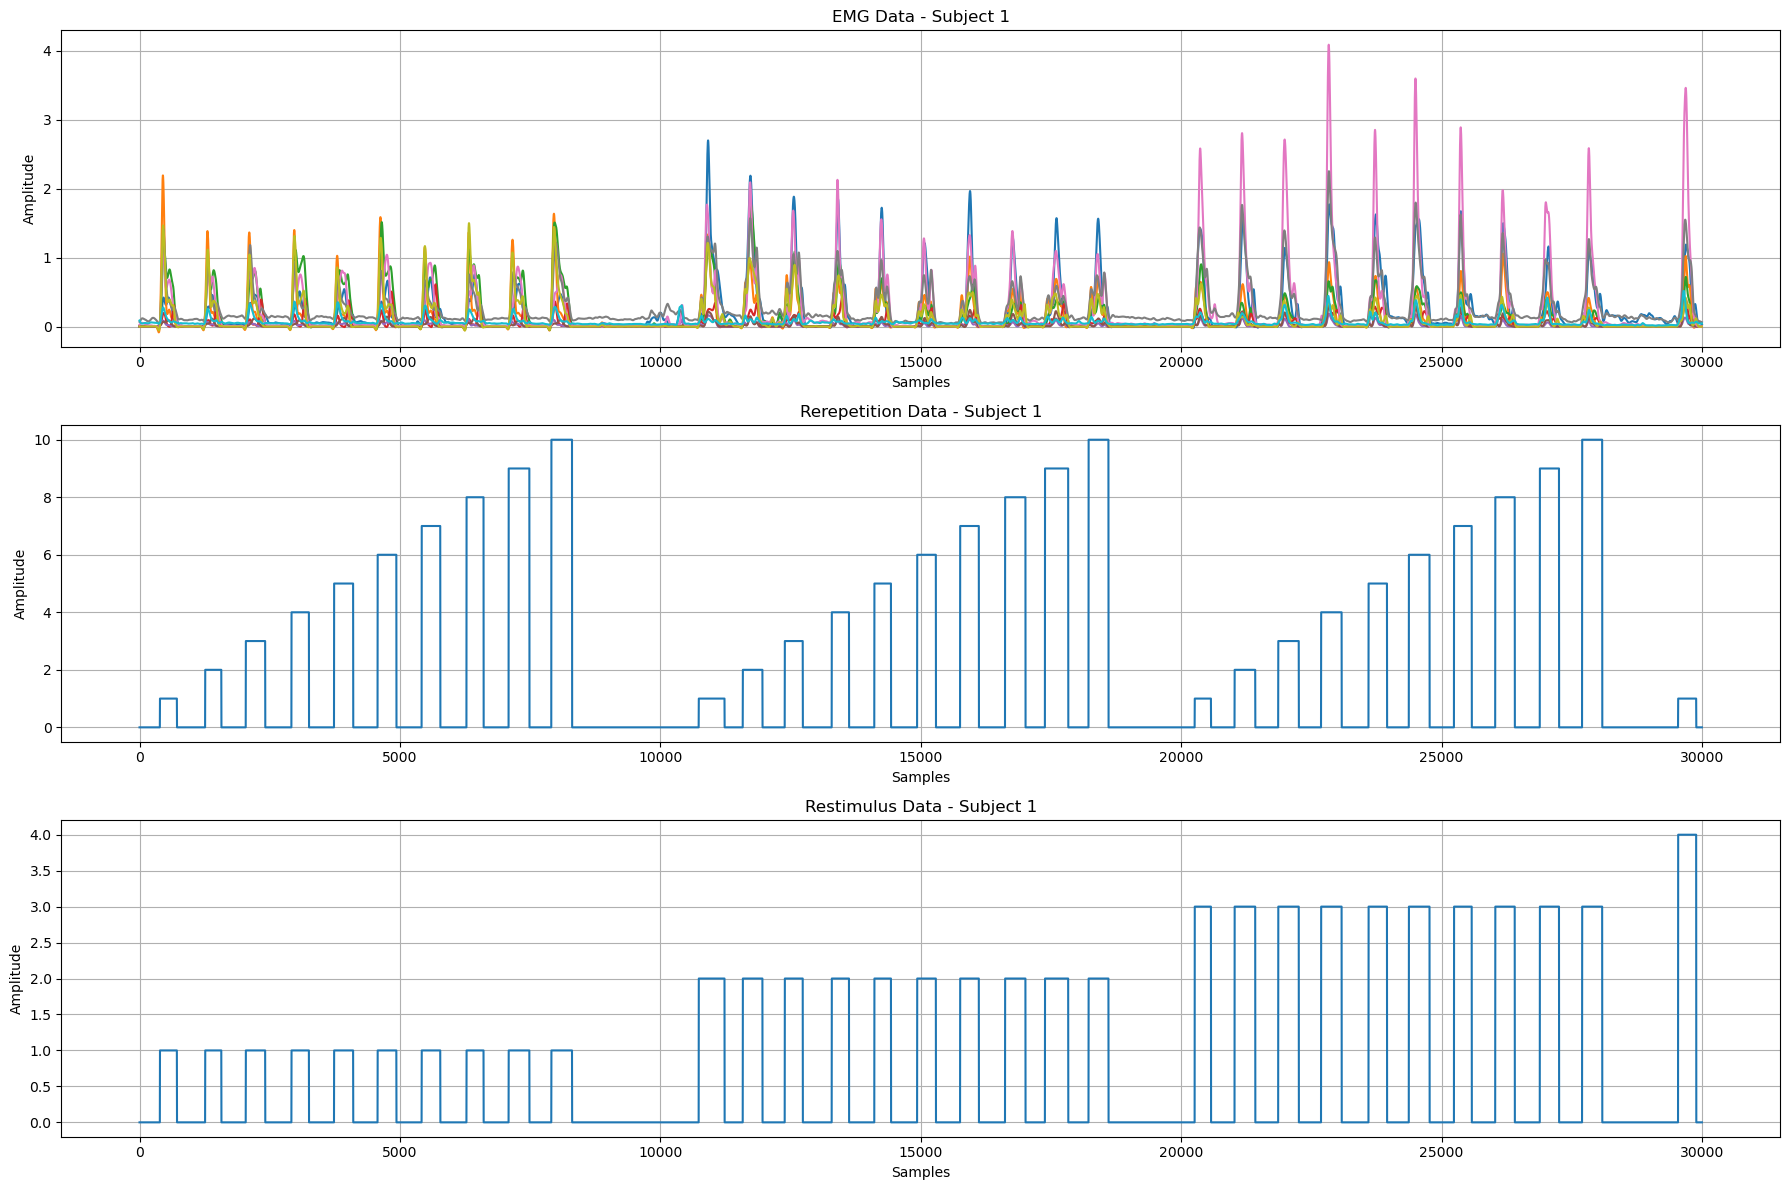

In [52]:
plt.figure(figsize=(18, 12))

# Primer subplot para emg_s1
plt.subplot(3, 1, 1)
plt.plot(emg_s1_e3_filter[:END_POINT])  # Muestra los primeros 10,000 puntos
plt.title("EMG Data - Subject 1")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid(True)

# Segundo subplot para rerepetition_s1
plt.subplot(3, 1, 2)
plt.plot(rerepetition_s1_e3[:END_POINT])  # Muestra los primeros 10,000 puntos
plt.title("Rerepetition Data - Subject 1")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid(True)

# Tercer subplot para restimulus_s1
plt.subplot(3, 1, 3)
plt.plot(restimulus_s1_e3[:END_POINT])  # Muestra los primeros 10,000 puntos
plt.title("Restimulus Data - Subject 1")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()

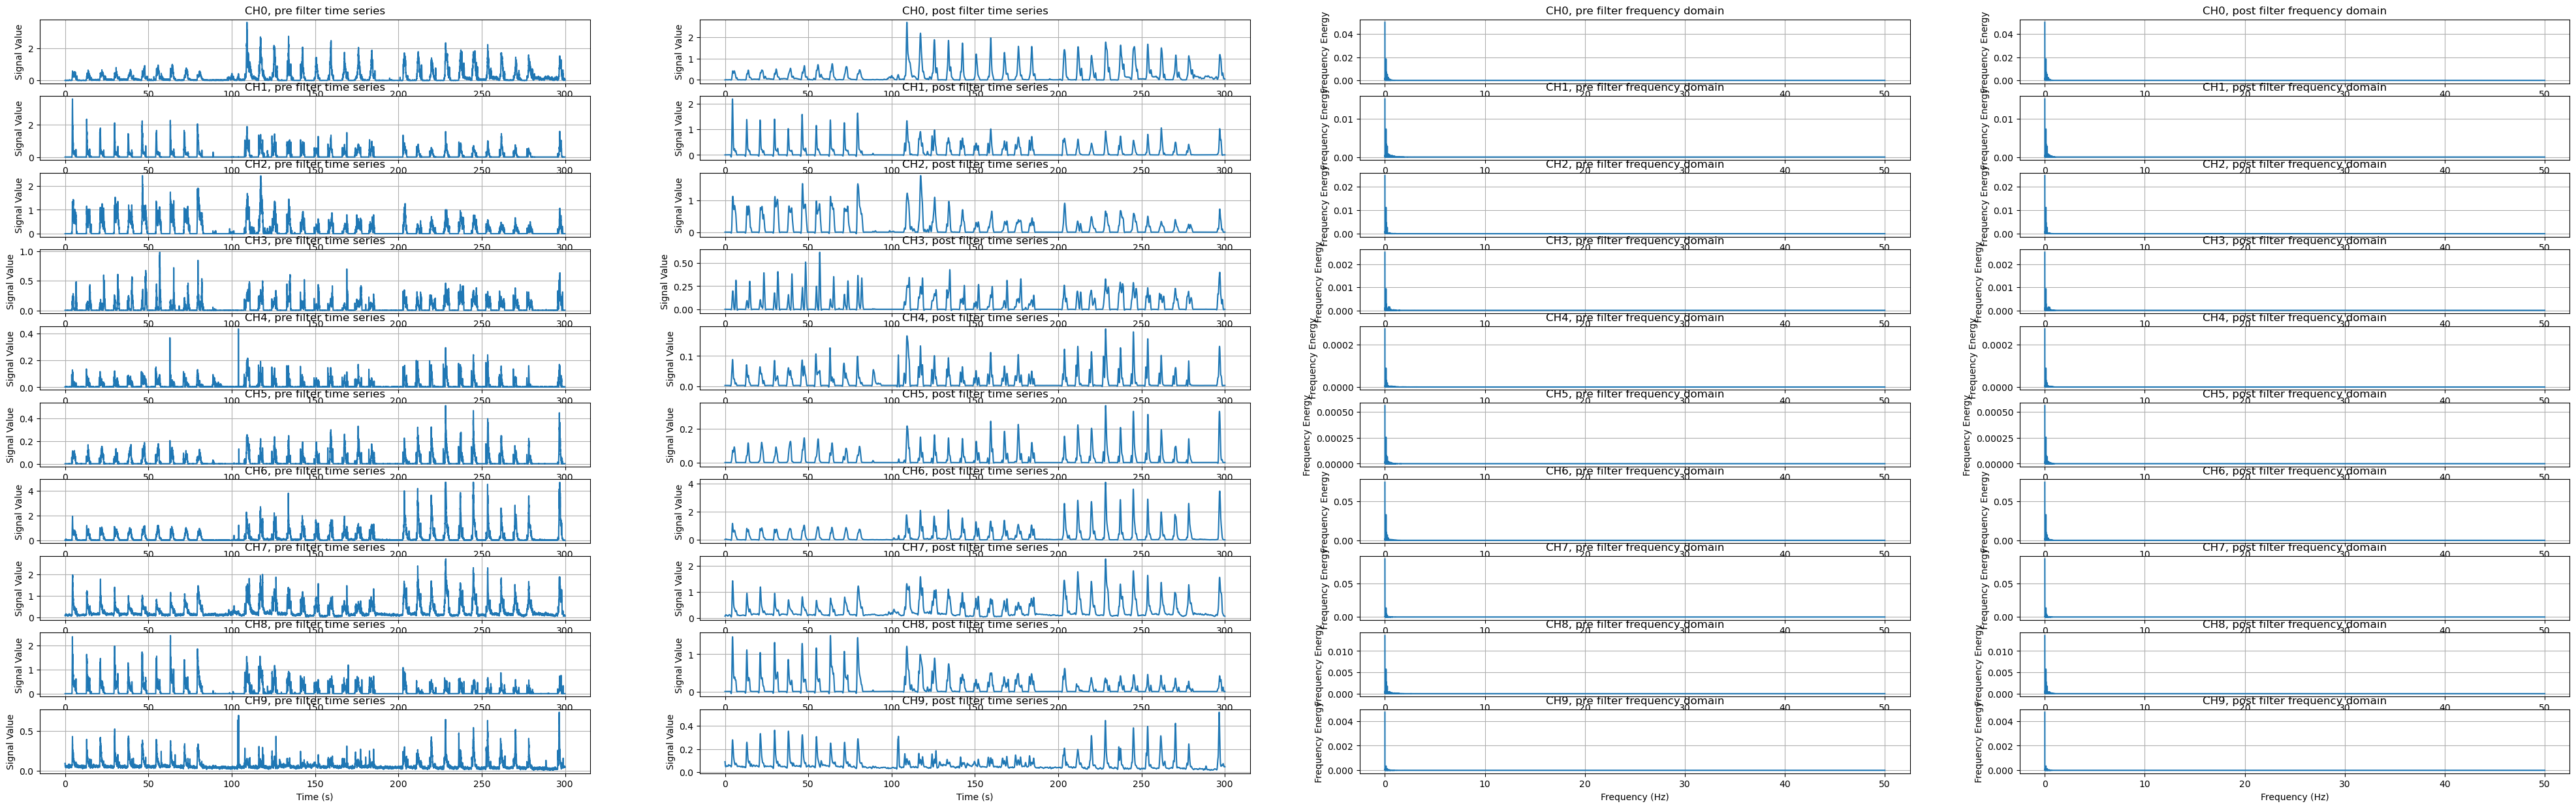

In [54]:
fi.visualize_effect(emg_s1_e3[:END_POINT])

### Extracción de caracteristicas

In [56]:
emg_s1_e3_filter.shape

(227493, 10)

In [57]:
import numpy as np
from libemg.utils import get_windows

In [58]:
# Split the raw EMG into windows
windows = get_windows(emg_s1_e3_filter, 30, 20)

In [59]:
windows.shape

(11374, 10, 30)

In [60]:
windows[0].shape

(10, 30)

In [61]:
windows[0:3,0] # Aqui se muestran superpuestas

array([[0.00297809, 0.00323179, 0.0034872 , 0.00374385, 0.00400127,
        0.00425896, 0.00451639, 0.00477302, 0.0050283 , 0.00528168,
        0.00553265, 0.0057807 , 0.0060253 , 0.00626587, 0.00650177,
        0.00673231, 0.00695675, 0.00717427, 0.00738402, 0.00758509,
        0.00777658, 0.00795756, 0.00812713, 0.00828441, 0.0084286 ,
        0.00855897, 0.0086749 , 0.00877589, 0.00886154, 0.00893163],
       [0.00777658, 0.00795756, 0.00812713, 0.00828441, 0.0084286 ,
        0.00855897, 0.0086749 , 0.00877589, 0.00886154, 0.00893163,
        0.00898604, 0.00902484, 0.00904824, 0.00905662, 0.0090505 ,
        0.00903051, 0.00899742, 0.00895206, 0.00889534, 0.0088282 ,
        0.00875158, 0.00866638, 0.00857345, 0.00847357, 0.00836751,
        0.00825606, 0.00814008, 0.00802043, 0.00789795, 0.00777341],
       [0.00875158, 0.00866638, 0.00857345, 0.00847357, 0.00836751,
        0.00825606, 0.00814008, 0.00802043, 0.00789795, 0.00777341,
        0.00764751, 0.00752088, 0.0073941 , 0.

#### Extracción de caracteristicas

In [64]:
from libemg.feature_extractor import FeatureExtractor

In [65]:
fe = FeatureExtractor()

In [66]:
# Extract a list of features
feature_list = ['RMS','MAV','WWL']
features = fe.extract_features(feature_list, windows)


c:\Users\Usuario\anaconda3\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 7 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [67]:
features.keys()

dict_keys(['RMS', 'MAV', 'WWL'])

In [69]:
features['RMS'].shape


(11374, 10)

In [72]:
END_WINDOW = 3000

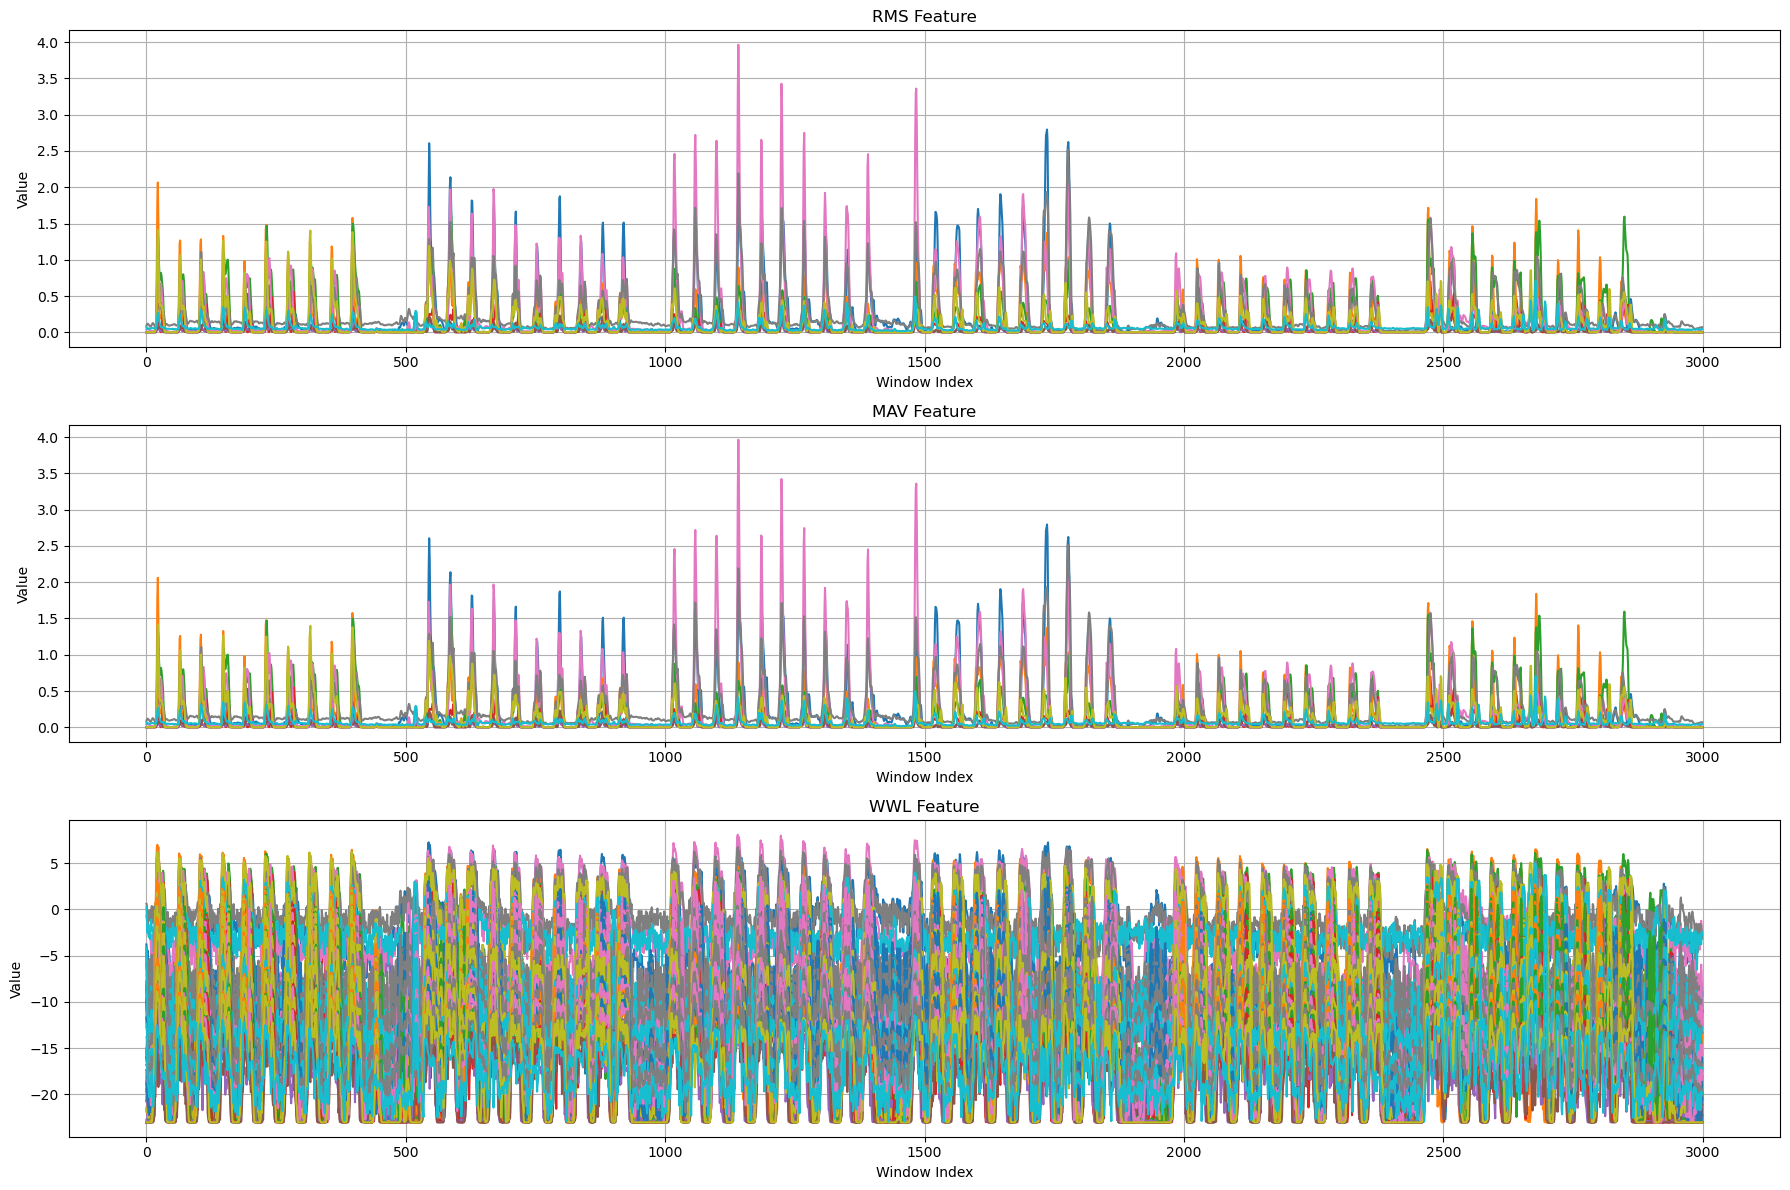

In [73]:
plt.figure(figsize=(18, 12))

for i, (feature_name, feature_data) in enumerate(features.items(), start=1):
    plt.subplot(len(features), 1, i)
    plt.plot(feature_data[:END_WINDOW])
    plt.title(f"{feature_name} Feature")
    plt.xlabel("Window Index")
    plt.ylabel("Value")
    plt.grid(True)

plt.tight_layout()
plt.show()